In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '816e1c38-b65c-4296-894f-4477c15f0e8b',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

In [3]:
type(data)

dict

In [4]:
import pandas as pd
import os
from time import time, sleep

pd.set_option('display.max_columns', False)
pd.set_option('display.max_rows', False)

In [54]:
df = pd.json_normalize(data['data'])

df['time_stamp'] = pd.to_datetime('now')
df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11220\838875087.py:3: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['time_stamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,time_stamp
0,1,Bitcoin,BTC,bitcoin,10957,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19674187.00000,19674187.00000,False,NaN,1,NaN,NaN,None,2024-04-05T20:49:00.000Z,67655.28576,35140166237.56430,3.07120,-0.02976,-0.37562,-2.80670,0.66541,59.69119,54.35150,1331062743585.16479,52.62930,1420761000964.79004,None,2024-04-05T20:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 21:24:06.309383
1,1027,Ethereum,ETH,ethereum,8726,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120068151.52197,120068151.52197,True,NaN,2,NaN,NaN,None,2024-04-05T20:48:00.000Z,3336.48401,15958553721.89241,11.63610,0.20686,0.33289,-4.55688,-13.84243,45.89655,48.82044,400605468123.83881,15.83970,400605468123.84003,None,2024-04-05T20:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 21:24:06.309383
2,825,Tether USDt,USDT,tether,81504,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,106601457935.07361,109942615136.74486,True,NaN,3,NaN,NaN,None,2024-04-05T20:48:00.000Z,1.00031,66938263175.43737,-2.75140,0.01452,-0.00519,-0.00419,-0.18060,0.12326,-0.04126,106634362661.17255,4.21620,109976551179.53000,None,2024-04-05T20:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-05 21:24:06.309383
3,1839,BNB,BNB,bnb,2132,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149535248.55305,149535248.55305,False,NaN,4,NaN,NaN,None,2024-04-05T20:48:00.000Z,581.79843,2097768368.07548,-8.17740,-0.12389,-0.86708,-5.11758,36.06379,93.13530,89.46479,86999373211.52748,3.43990,86999373211.53000,None,2024-04-05T20:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 21:24:06.309383
4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,444923776.83344,573353291.57435,True,NaN,5,NaN,NaN,None,2024-04-05T20:48:00.000Z,176.06524,6824801660.53304,77.85200,0.36109,-3.40103,-6.88502,34.56843,84.18408,85.94141,78335610066.49977,3.09730,100947582974.25999,None,2024-04-05T20:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 21:24:06.309383
5,3408,USDC,USDC,usd-coin,17939,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32853967735.82737,32853967735.82737,False,NaN,6,NaN,NaN,None,2024-04-05T20:48:00.000Z,0.99997,13154680135.73330,13.08090,0.01290,0.00739,0.00533,-0.01149,-0.03420,-0.01278,32853048185.72719,1.29930,32853048185.73000,None,2024-04-05T20:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-05 21:24:06.309383
6,52,XRP,XRP,xrp,1282,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55051549471.00000,99987715632.00000,False,NaN,7,NaN,NaN,None,2024-04-05T20:49:00.000Z,0.59114,1541991355.92359,-30.91050,0.36958,0.00123,-5.67756,-3.50801,16.54675,3.99774,32543160810.32156,1.28670,59113977940.74000,None,2024-04-05T20:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 21:24:06.309383
7,74,Dogecoin,DOGE,dogecoin,944,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,143764566383.70523,143764566383.70523,True,NaN,8,NaN,NaN,None,2024-04-05T20:49:00.000Z,0.17911,2007028774.01450,-10.07860,1.02718,-0.46823,-15.72265,12.99143,129.60093,121.38484,25749070877.09690,1.01810,25749070877.10000,None,2024-04-05T20:49:00.000Z

In [6]:
def api_runner(df):
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
    }
    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '816e1c38-b65c-4296-894f-4477c15f0e8b',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    df = pd.json_normalize(data['data'])
    df['time_stamp'] = pd.to_datetime('now', utc=True)
    df

    #append the data to a csv
    if not os.path.isfile(r'E:\Coding\Crypto API\data.csv'):
        df.to_csv(r'E:\Coding\Crypto API\data.csv', header='column_names')
    else:
        df.to_csv(r'E:\Coding\Crypto API\data.csv', mode='a', header=False)

    return df

In [7]:
for i in range(5):
    df = api_runner(df)
    print("API Runner completed")
    sleep(60) #sleep for 1 minute


API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


In [56]:
df2 = pd.read_csv('data.csv')
df['time_stamp'] = pd.to_datetime(df['time_stamp'], format='%Y-%m-%d %H:%M:%S.%f%z')
df2

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,time_stamp
0,1,Bitcoin,BTC,bitcoin,10951,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19673506.00000,19673506.00000,False,NaN,1,NaN,NaN,NaN,2024-04-05T04:43:00.000Z,67636.64053,35015010718.70165,11.16190,-0.30333,3.46540,-4.06089,6.18727,58.31084,53.90463,1330649853255.04126,52.80940,1420369451096.10010,NaN,2024-04-05T04:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 04:43:56.057501+00:00
1,1027,Ethereum,ETH,ethereum,8723,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120139718.91618,120139718.91618,True,NaN,2,NaN,NaN,NaN,2024-04-05T04:42:00.000Z,3288.28077,14540801540.58505,-2.32300,-0.25780,0.09027,-8.08519,-7.92210,43.32428,45.95711,395053127179.10797,15.67840,395053127179.10999,NaN,2024-04-05T04:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 04:43:56.057501+00:00
2,825,Tether USDt,USDT,tether,81279,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,106601457935.07359,109942615136.74486,True,NaN,3,NaN,NaN,NaN,2024-04-05T04:42:00.000Z,1.00033,68052792277.11847,-0.20620,0.01714,0.03240,0.04818,-0.02963,0.07365,-0.06298,106636852748.55048,4.23210,109979119312.50000,NaN,2024-04-05T04:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-05 04:43:56.057501+00:00
3,1839,BNB,BNB,bnb,2130,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,149535345.44126,149535345.44126,False,NaN,4,NaN,NaN,NaN,2024-04-05T04:42:00.000Z,576.10466,2138384577.04328,-4.90610,-0.66861,-0.27838,-5.71118,44.60978,89.86421,86.86626,86148009114.81242,3.41890,86148009114.81000,NaN,2024-04-05T04:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 04:43:56.057501+00:00
4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,444928751.03708,573356764.47868,True,NaN,5,NaN,NaN,NaN,2024-04-05T04:42:00.000Z,176.84309,4105557157.77106,6.08770,-1.42079,-2.71118,-6.37407,43.85233,83.29285,79.52746,78682573319.37137,3.12270,101394179526.72000,NaN,2024-04-05T04:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 04:43:56.057501+00:00
5,3408,USDC,USDC,usd-coin,17887,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,33025665520.59998,33025665520.59998,False,NaN,6,NaN,NaN,NaN,2024-04-05T04:42:00.000Z,0.99984,11546166199.23129,17.43660,-0.00837,0.00135,-0.00691,-0.01890,-0.04976,-0.01624,33020387638.31089,1.30990,33020387638.31000,NaN,2024-04-05T04:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-05 04:43:56.057501+00:00
6,52,XRP,XRP,xrp,1280,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55051549471.00000,99987715632.00000,False,NaN,7,NaN,NaN,NaN,2024-04-05T04:43:00.000Z,0.58380,2142656887.55293,39.95840,-0.59076,3.13291,-6.29006,-0.76531,15.67689,1.71533,32139278172.17437,1.27550,58380333489.26000,NaN,2024-04-05T04:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 04:43:56.057501+00:00
7,74,Dogecoin,DOGE,dogecoin,942,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,143756206383.70520,143756206383.70520,True,NaN,8,NaN,NaN,NaN,2024-04-05T04:43:00.000Z,0.17417,2053601207.09360,-20.41200,-1.51189,0.02918,-19.21884,13.79376,122.86006,112.27454,25038515462.83307,0.99370,25038515462.83000,Na

Transforming the Data

In [8]:
pd.set_option('display.float_format', lambda x:'%.5f' % x)
df2

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,time_stamp
0,1,Bitcoin,BTC,bitcoin,10951,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19673506.00000,19673506.00000,False,NaN,1,NaN,NaN,NaN,2024-04-05T04:43:00.000Z,67636.64053,35015010718.70165,11.16190,-0.30333,3.46540,-4.06089,6.18727,58.31084,53.90463,1330649853255.04126,52.80940,1420369451096.10010,NaN,2024-04-05T04:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 04:43:56.057501+00:00
1,1027,Ethereum,ETH,ethereum,8723,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120139718.91618,120139718.91618,True,NaN,2,NaN,NaN,NaN,2024-04-05T04:42:00.000Z,3288.28077,14540801540.58505,-2.32300,-0.25780,0.09027,-8.08519,-7.92210,43.32428,45.95711,395053127179.10797,15.67840,395053127179.10999,NaN,2024-04-05T04:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 04:43:56.057501+00:00
2,825,Tether USDt,USDT,tether,81279,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,106601457935.07359,109942615136.74486,True,NaN,3,NaN,NaN,NaN,2024-04-05T04:42:00.000Z,1.00033,68052792277.11847,-0.20620,0.01714,0.03240,0.04818,-0.02963,0.07365,-0.06298,106636852748.55048,4.23210,109979119312.50000,NaN,2024-04-05T04:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-05 04:43:56.057501+00:00
3,1839,BNB,BNB,bnb,2130,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,149535345.44126,149535345.44126,False,NaN,4,NaN,NaN,NaN,2024-04-05T04:42:00.000Z,576.10466,2138384577.04328,-4.90610,-0.66861,-0.27838,-5.71118,44.60978,89.86421,86.86626,86148009114.81242,3.41890,86148009114.81000,NaN,2024-04-05T04:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 04:43:56.057501+00:00
4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,444928751.03708,573356764.47868,True,NaN,5,NaN,NaN,NaN,2024-04-05T04:42:00.000Z,176.84309,4105557157.77106,6.08770,-1.42079,-2.71118,-6.37407,43.85233,83.29285,79.52746,78682573319.37137,3.12270,101394179526.72000,NaN,2024-04-05T04:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 04:43:56.057501+00:00
5,3408,USDC,USDC,usd-coin,17887,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,33025665520.59998,33025665520.59998,False,NaN,6,NaN,NaN,NaN,2024-04-05T04:42:00.000Z,0.99984,11546166199.23129,17.43660,-0.00837,0.00135,-0.00691,-0.01890,-0.04976,-0.01624,33020387638.31089,1.30990,33020387638.31000,NaN,2024-04-05T04:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-05 04:43:56.057501+00:00
6,52,XRP,XRP,xrp,1280,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55051549471.00000,99987715632.00000,False,NaN,7,NaN,NaN,NaN,2024-04-05T04:43:00.000Z,0.58380,2142656887.55293,39.95840,-0.59076,3.13291,-6.29006,-0.76531,15.67689,1.71533,32139278172.17437,1.27550,58380333489.26000,NaN,2024-04-05T04:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 04:43:56.057501+00:00
7,74,Dogecoin,DOGE,dogecoin,942,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,143756206383.70520,143756206383.70520,True,NaN,8,NaN,NaN,NaN,2024-04-05T04:43:00.000Z,0.17417,2053601207.09360,-20.41200,-1.51189,0.02918,-19.21884,13.79376,122.86006,112.27454,25038515462.83307,0.99370,25038515462.83000,Na

In [11]:
df3 = df2.groupby('name', sort=False)[['quote.USD.percent_change_1h',	'quote.USD.percent_change_24h',	'quote.USD.percent_change_7d',	'quote.USD.percent_change_30d',	'quote.USD.percent_change_60d',	'quote.USD.percent_change_90d']].mean()

In [12]:
df4  = df3.stack()
df4 #series not a DF

name                                  
Bitcoin   quote.USD.percent_change_1h     -0.32316
          quote.USD.percent_change_24h     3.41073
          quote.USD.percent_change_7d     -4.05958
          quote.USD.percent_change_30d     6.12908
          quote.USD.percent_change_60d    58.30189
          quote.USD.percent_change_90d    53.87759
Ethereum  quote.USD.percent_change_1h     -0.39486
          quote.USD.percent_change_24h     0.02475
          quote.USD.percent_change_7d     -8.16802
          quote.USD.percent_change_30d    -8.14439
          quote.USD.percent_change_60d    43.24639
          quote.USD.percent_change_90d    45.81362
                                            ...   
Polkadot  quote.USD.percent_change_1h     -0.82909
          quote.USD.percent_change_24h     0.09642
          quote.USD.percent_change_7d    -11.91083
          quote.USD.percent_change_30d    -9.98181
          quote.USD.percent_change_60d    21.92306
          quote.USD.percent_change_90d    1

In [14]:
df5 = df4.to_frame(name='values')
df5


values
name                                           
Bitcoin  quote.USD.percent_change_1h   -0.32316
         quote.USD.percent_change_24h   3.41073
         quote.USD.percent_change_7d   -4.05958
         quote.USD.percent_change_30d   6.12908
         quote.USD.percent_change_60d  58.30189
         quote.USD.percent_change_90d  53.87759
Ethereum quote.USD.percent_change_1h   -0.39486
         quote.USD.percent_change_24h   0.02475
         quote.USD.percent_change_7d   -8.16802
...                                         ...
Polkadot quote.USD.percent_change_30d  -9.98181
         quote.USD.percent_change_60d  21.92306
         quote.USD.percent_change_90d  14.12419
TRON     quote.USD.percent_change_1h   -0.16714
         quote.USD.percent_change_24h   1.55169
         quote.USD.percent_change_7d   -1.39901
         quote.USD.percent_change_30d -12.71091
         quote.USD.percent_change_60d  -0.52334
         quote.USD.percent_change_90d  14.72339

[90 rows x 1 columns]

In [21]:
#create an index
df5.count()

index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.32316
1,Bitcoin,quote.USD.percent_change_24h,3.41073
2,Bitcoin,quote.USD.percent_change_7d,-4.05958
3,Bitcoin,quote.USD.percent_change_30d,6.12908
4,Bitcoin,quote.USD.percent_change_60d,58.30189
5,Bitcoin,quote.USD.percent_change_90d,53.87759
6,Ethereum,quote.USD.percent_change_1h,-0.39486
7,Ethereum,quote.USD.percent_change_24h,0.02475
8,Ethereum,quote.USD.percent_change_7d,-8.16802
...,...,...,...


In [23]:
df6.rename(columns={'level_1': 'percent_change'}, inplace=True)
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.32316
1,Bitcoin,quote.USD.percent_change_24h,3.41073
2,Bitcoin,quote.USD.percent_change_7d,-4.05958
3,Bitcoin,quote.USD.percent_change_30d,6.12908
4,Bitcoin,quote.USD.percent_change_60d,58.30189
5,Bitcoin,quote.USD.percent_change_90d,53.87759
6,Ethereum,quote.USD.percent_change_1h,-0.39486
7,Ethereum,quote.USD.percent_change_24h,0.02475
8,Ethereum,quote.USD.percent_change_7d,-8.16802
...,...,...,...


In [29]:
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

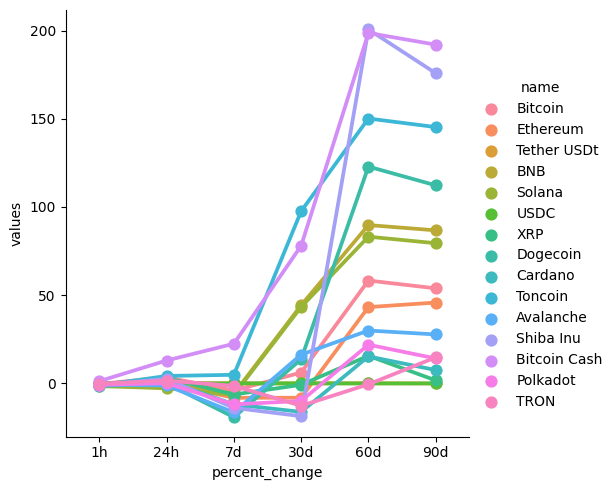

In [33]:
hue_order = df6['name'].unique()

sns.catplot(x='percent_change', y='values', hue='name', data=df6, kind='point', hue_order = hue_order)

In [34]:
df6.to_csv('data2.csv')

In [53]:
df10 = df2[['name','quote.USD.price','time_stamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

#fix the time_stamp column
# format_string = '%Y-%m-%d %H:%M:%S.%f%z'
# df10['time_stamp'] = pd.to_datetime(df['time_stamp'], format=format_string)
# df10



,name,quote.USD.price,time_stamp
0,Bitcoin,67636.64053,2024-04-05 04:43:56.057501+00:00
15,Bitcoin,67636.64053,2024-04-05 04:43:56.412809+00:00
30,Bitcoin,67634.66980,2024-04-05 04:44:56.869211+00:00
45,Bitcoin,67624.89333,2024-04-05 04:45:57.312268+00:00
60,Bitcoin,67668.45156,2024-04-05 04:46:57.756583+00:00
75,Bitcoin,67536.44919,2024-04-05 04:47:58.083010+00:00


<AxesSubplot: xlabel='time_stamp', ylabel='quote.USD.price'>

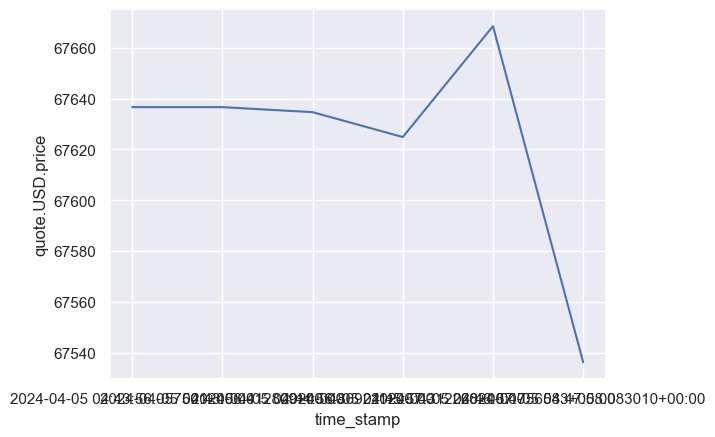

In [55]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='time_stamp', y='quote.USD.price', data=df10)